# Setup

In [62]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Download the dataset

In [63]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [64]:
fetch_housing_data()

# Take a Quick Look at the Data Structure

In [65]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [66]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [67]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Visualize the Data to Gain Insights

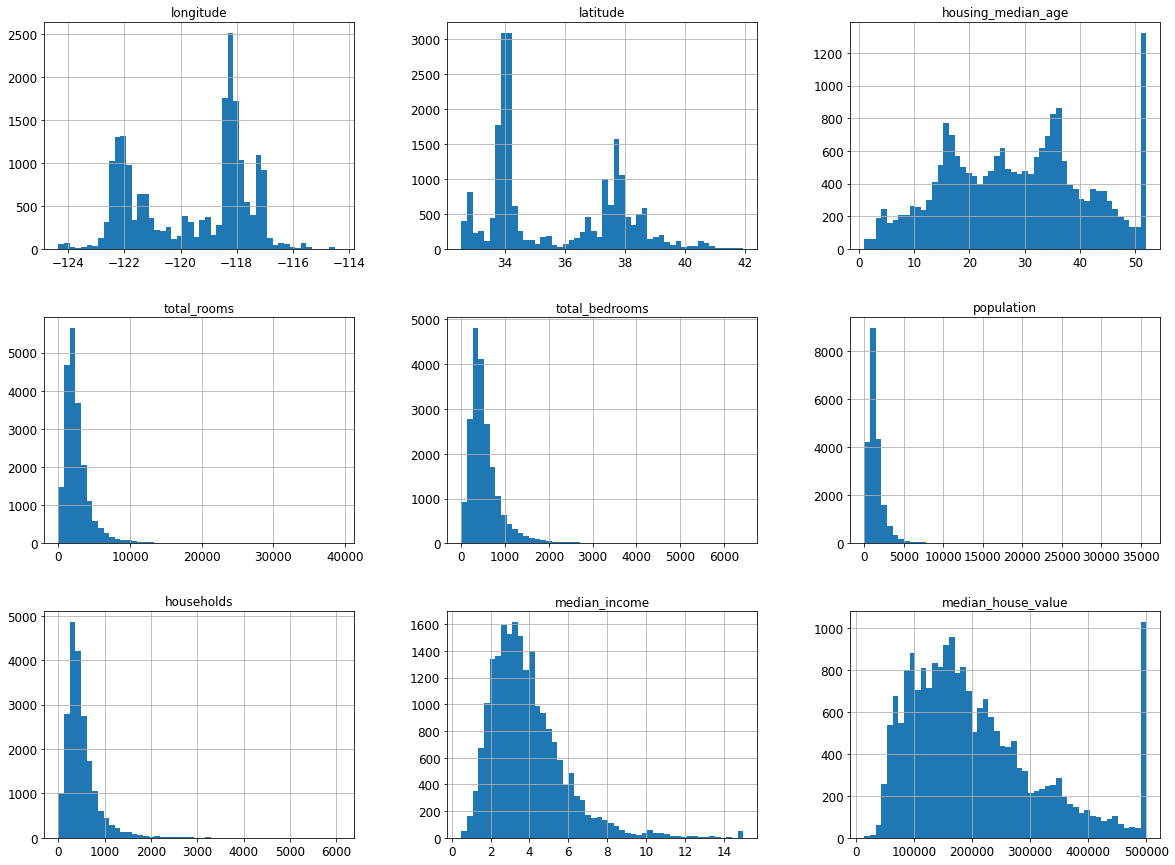

In [68]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Looking for Feature Correlations

In [69]:
corr_matrix = housing.corr()

In [70]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

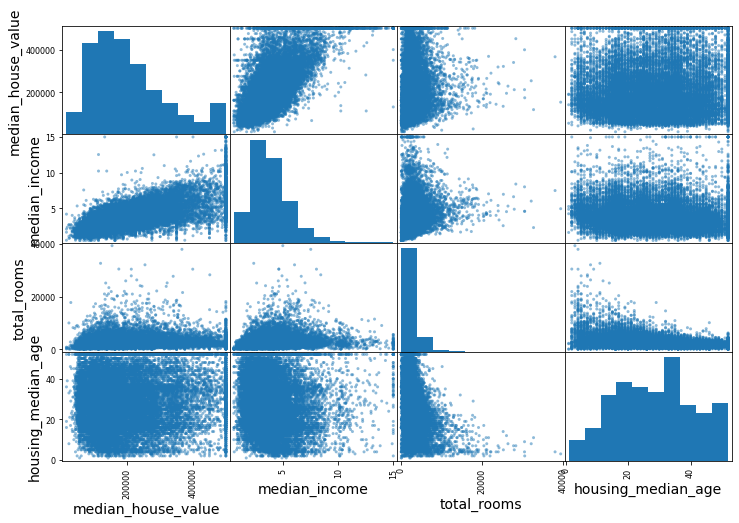

In [71]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

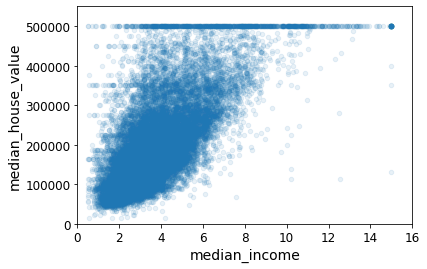

In [72]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

# Experimenting with Attribute Combinations

In [73]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [74]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

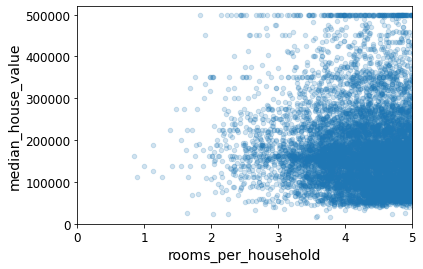

In [75]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

# Separate median_house_value from other features as label value

After the operation of this step, the machine learing task is to predict the median house value for the district based on the input features including median_income, housing_median_age, etc.

In [76]:
housing_labels = housing["median_house_value"].copy() # use median_house_value as label
housing_features = housing.drop("median_house_value", axis=1) # drop median_house_value

In [77]:
housing_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,0.219892,2.123209


In [78]:
housing_labels

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

# Data Cleaning – Missing Features

```python
housing_features.dropna(subset=["total_bedrooms"])    # option 1
housing_features.drop("total_bedrooms", axis=1)       # option 2
median = housing_features["total_bedrooms"].median()  # option 3
housing_features["total_bedrooms"].fillna(median, inplace=True)
```

In [79]:
housing_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   ocean_proximity           20640 non-null  object 
 9   rooms_per_household       20640 non-null  float64
 10  bedrooms_per_room         20433 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.9+ MB


In [80]:
#Use option 3 here to deal with total_bedrooms
median = housing_features["total_bedrooms"].median()
housing_features["total_bedrooms"].fillna(median, inplace=True) # option 3

In [81]:
#Use option 3 here to deal with bedrooms_per_room
median = housing_features["bedrooms_per_room"].median()
housing_features["bedrooms_per_room"].fillna(median, inplace=True) # option 3

In [82]:
#Check if there are still records with null feature values
housing_features[housing_features.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household


# Handling Text and Categorical Attributes

In [83]:
#housing_num only includes the numerical columns without ocean_proximity
housing_num = housing_features.drop("ocean_proximity", axis=1)

#housing_cat only includes the categorical column (ocean_proximity)
housing_cat = housing_features[["ocean_proximity"]]
housing_cat["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

There are two ways to convert the categories to numbers

*****The first way*****

In [84]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [85]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

*****The second way*****

In [86]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_encoded = cat_encoder.fit_transform(housing_cat)
housing_cat_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [87]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Scaling numerical features

In [88]:
from sklearn.preprocessing import StandardScaler

std_scaler  = StandardScaler()
housing_num_scaled = std_scaler.fit_transform(housing_num)
housing_num_scaled

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -1.14993031, -0.04959654],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.99038135, -0.09251223],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -1.44586501, -0.02584253],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
         0.03870567, -0.0717345 ],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
         0.12050112, -0.09122515],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
         0.14290124, -0.04368215]])

In [89]:
import numpy as np

#Here we use the second way to convert categorical features into numbers
cat_encoder = OneHotEncoder()
housing_cat_encoded = cat_encoder.fit_transform(housing_cat)
housing_cat_encoded = housing_cat_encoded.toarray()

#Concatenate numerical features and categorical features into final features X
X = np.concatenate((housing_num_scaled, housing_cat_encoded), axis=1)

In [90]:
X.shape

(20640, 16)

In [91]:
y = housing_labels.to_numpy()

In [92]:
y.shape

(20640,)

# We are ready to use housing_prepared (features) and housing_labels (labels) to train a linear regression model to predict the median house value

# Split dataset into training dataset and test dataset

In [93]:
from sklearn.model_selection import train_test_split

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X_train_set.shape

(16512, 16)

In [95]:
y_train_set.shape

(16512,)

In [96]:
X_test_set.shape

(4128, 16)

In [97]:
y_test_set.shape

(4128,)

# Training a linear regression model using training data set

In [98]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_set, y_train_set)

LinearRegression()

# Testing on test dataset

In [99]:
y_predict = lin_reg.predict(X_test_set)

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

#Root Mean Square Error (RMSE)
mse = mean_squared_error(y_test_set, y_predict)
rmse = np.sqrt(mse)

#Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_set, y_predict)

In [101]:
print("Root Mean Square Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Square Error (RMSE): 69126.81294720496
Mean Absolute Error (MAE): 49645.51121785363
